# Decathlon (prostate) dataset exploration

In [ ]:
import os
from os.path import join
import sys
sys.path.append("../")
import matplotlib.pyplot as plt
import pandas as pd
import SimpleITK as sitk

from exploratoryAnalysis.DataAnalyzer import DataAnalyzer
from preprocessing.Utils import *
from time import perf_counter

DATA_ROOT = "/media/guest/PORT-DISK/Datasets/Prostate-Datasets/decathlon/Task05_Prostate"

paths = {
    "imagesTr" : join(DATA_ROOT, "imagesTr"),
    "imagesTs" : join(DATA_ROOT, "imagesTs"),
    "labelsTr" : join(DATA_ROOT, "labelsTr")
    # there are no labels for the test set
}

analyzer = DataAnalyzer(DATA_ROOT)


> Every patient case will at least have three imaging sequences: axial T2W, axial DWI and axial ADC scans (i.e. files ending in _t2w.mha, _hbv.mha, _adc.mha). Additionally, they can also have either, both or none of these optional imaging sequences: sagittal and coronal T2W scans (i.e. files ending in _sag.mha, _cor.mha here). 

Now, we plot some of the images. We also need to see how each zone is labeled. (pz=1 or 2, tz=1 or 2, etc.)

**As we see, the TZ is labeled as 2 and the PZ as 1.**

Randomly picked file: /media/guest/PORT-DISK/Datasets/Prostate-Datasets/decathlon/Task05_Prostate/imagesTr/prostate_29.nii.gz
Image shape: (2, 15, 320, 320)
Pixel spacing: (0.6000000238418579, 0.599999725818634, 3.999998092651367, 1.0)
Image shape after removing first channel: (15, 320, 320)
Label path: /media/guest/PORT-DISK/Datasets/Prostate-Datasets/decathlon/Task05_Prostate/labelsTr/prostate_29.nii.gz
Label shape: (15, 320, 320)
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


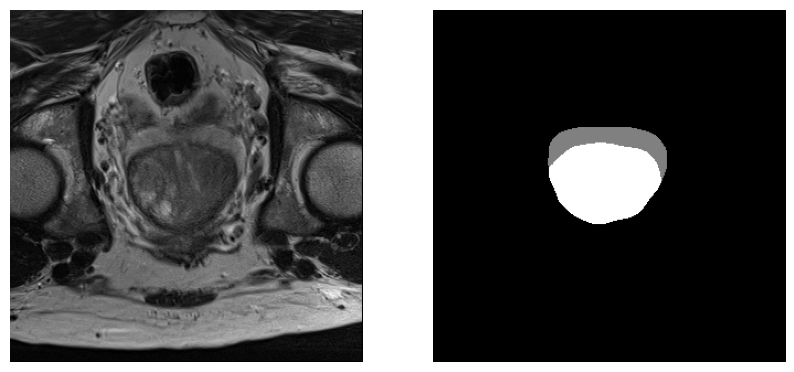

In [105]:
# pick a random folder and set the name of a file inside as the prefix
rand = analyzer.pick_random(paths["imagesTr"], 1, type="file")

# load the image
sitk_image = sitk.ReadImage(rand)
image = sitk.GetArrayFromImage(sitk_image)
# get the shape of the image
shape = image.shape
print(f"Randomly picked file: {rand}")
print(f"Image shape: {shape}")
# print the pixel spacing
spacing = sitk_image.GetSpacing()
print(f"Pixel spacing: {spacing}")

# remove first dim with dim 2, presumably channel or metadata
image = image[0, ...]
print(f"Image shape after removing first channel: {image.shape}")

# find id and associate qith label
id = os.path.basename(rand).split(".")[0].split("_")[1]
label_path = join(paths["labelsTr"], f"prostate_{id}.nii.gz")
print(f"Label path: {label_path}")
label = sitk.GetArrayFromImage(sitk.ReadImage(label_path))
print(f"Label shape: {label.shape}")

analyzer.show_image(image, label)



Some of the labels are not readable, so we can't use them. 
There is also an image that is not readable.

In [66]:
# Check for empty masks in the training set
non_empty_count = 0
empty_masks = []

for file in os.listdir(paths["labelsTr"]):
    
    # Check if the mask is empty
    if analyzer.is_empty_mask(join(paths["labelsTr"], file)):
        empty_masks.append(file)
    else:
        non_empty_count += 1

print(f"{non_empty_count} out of {non_empty_count+len(empty_masks)} masks are non-empty (contain a segmentation).")
print("Empty mask files:", empty_masks)

Error reading /media/guest/PORT-DISK/Datasets/Prostate-Datasets/decathlon/Task05_Prostate/labelsTr/._prostate_41.nii.gz: Exception thrown in SimpleITK ImageFileReader_Execute: /tmp/SimpleITK/Code/IO/src/sitkImageReaderBase.cxx:99:
sitk::ERROR: Unable to determine ImageIO reader for "/media/guest/PORT-DISK/Datasets/Prostate-Datasets/decathlon/Task05_Prostate/labelsTr/._prostate_41.nii.gz"
Error reading /media/guest/PORT-DISK/Datasets/Prostate-Datasets/decathlon/Task05_Prostate/labelsTr/._prostate_34.nii.gz: Exception thrown in SimpleITK ImageFileReader_Execute: /tmp/SimpleITK/Code/IO/src/sitkImageReaderBase.cxx:99:
sitk::ERROR: Unable to determine ImageIO reader for "/media/guest/PORT-DISK/Datasets/Prostate-Datasets/decathlon/Task05_Prostate/labelsTr/._prostate_34.nii.gz"
Error reading /media/guest/PORT-DISK/Datasets/Prostate-Datasets/decathlon/Task05_Prostate/labelsTr/._prostate_25.nii.gz: Exception thrown in SimpleITK ImageFileReader_Execute: /tmp/SimpleITK/Code/IO/src/sitkImageReader

Now, we use the function the analyzer to analyze the metadata.

In [ ]:
# use this regex to filter the files


start = perf_counter()

files = list(analyzer.get_files(paths["imagesTr"], regex="^p"))
print(f"Found {len(files)} files matching the regex '^p' in {paths['imagesTr']}")

records = []
for f in files:
    record = analyzer.parse_metadata_file(f)
    records.append(record)
df = pd.DataFrame(records)

print(df)
print(perf_counter() - start, "seconds")

Found 32 files matching the regex '^p' in /media/guest/PORT-DISK/Datasets/Prostate-Datasets/decathlon/Task05_Prostate/imagesTr
Error decoding line in /media/guest/PORT-DISK/Datasets/Prostate-Datasets/decathlon/Task05_Prostate/imagesTr/prostate_16.nii.gz: b'\x1f\x8b\x08\x00\x00\x00\x00\x00\x00\x13\xa4\x9d\x0b\xb4U'...
Error decoding line in /media/guest/PORT-DISK/Datasets/Prostate-Datasets/decathlon/Task05_Prostate/imagesTr/prostate_04.nii.gz: b'\x1f\x8b\x08\x00\x00\x00\x00\x00\x00\x13\xa4\xbd\t\xb4\\'...
Error decoding line in /media/guest/PORT-DISK/Datasets/Prostate-Datasets/decathlon/Task05_Prostate/imagesTr/prostate_32.nii.gz: b'\x1f\x8b\x08\x00\x00\x00\x00\x00\x00\x13\xa4\xbd\t\xd4e'...
Error decoding line in /media/guest/PORT-DISK/Datasets/Prostate-Datasets/decathlon/Task05_Prostate/imagesTr/prostate_20.nii.gz: b'\x1f\x8b\x08\x00\x00\x00\x00\x00\x00\x13\xa4\xbd\t\xd4\x96'...
Error decoding line in /media/guest/PORT-DISK/Datasets/Prostate-Datasets/decathlon/Task05_Prostate/imagesTr

This dataset has significantly no extra metadata information, apart from image dims

In [75]:
df

,filename,dim_size,spacing,orientation,prostate_volume,vendor,mri_name,psa_report
0,prostate_16.nii.gz,"(320, 320, 20, 2)","(0.625, 0.625, 3.6, 1.0)",None,None,None,None,None
1,prostate_04.nii.gz,"(320, 320, 15, 2)","(0.6, 0.6, 4.0, 1.0)",None,None,None,None,None
2,prostate_32.nii.gz,"(320, 320, 20, 2)","(0.625, 0.625, 3.6, 1.0)",None,None,None,None,None
3,prostate_20.nii.gz,"(320, 320, 20, 2)","(0.625, 0.625, 3.6, 1.0)",None,None,None,None,None
4,prostate_43.nii.gz,"(320, 320, 20, 2)","(0.625, 0.625, 3.6, 1.0)",None,None,None,None,None
5,prostate_18.nii.gz,"(256, 256, 18, 2)","(0.75, 0.75, 4.0, 1.0)",None,None,None,None,None
6,prostate_06.nii.gz,"(320, 320, 20, 2)","(0.625, 0.625, 3.6, 1.0)",None,None,None,None,None
7,prostate_14.nii.gz,"(320, 320, 20, 2)","(0.625, 0.625, 3.6, 1.0)",None,None,None,None,None
8,prostate_41.nii.gz,"(256, 256, 18, 2)","(0.75, 0.75, 3.0, 1.0)",None,None,None,None,None
9,prostate_34.nii.gz,"(320, 320, 15, 2)","(0.6, 0.6, 4.0, 1.0)",None,None,None,None,None


Now, we are interested in the dimensons and resolutions of the data, and how they are distrubuted trough the dataset.

This dataset also does not provide several anatomical orientations (axial, sagital, coronal).

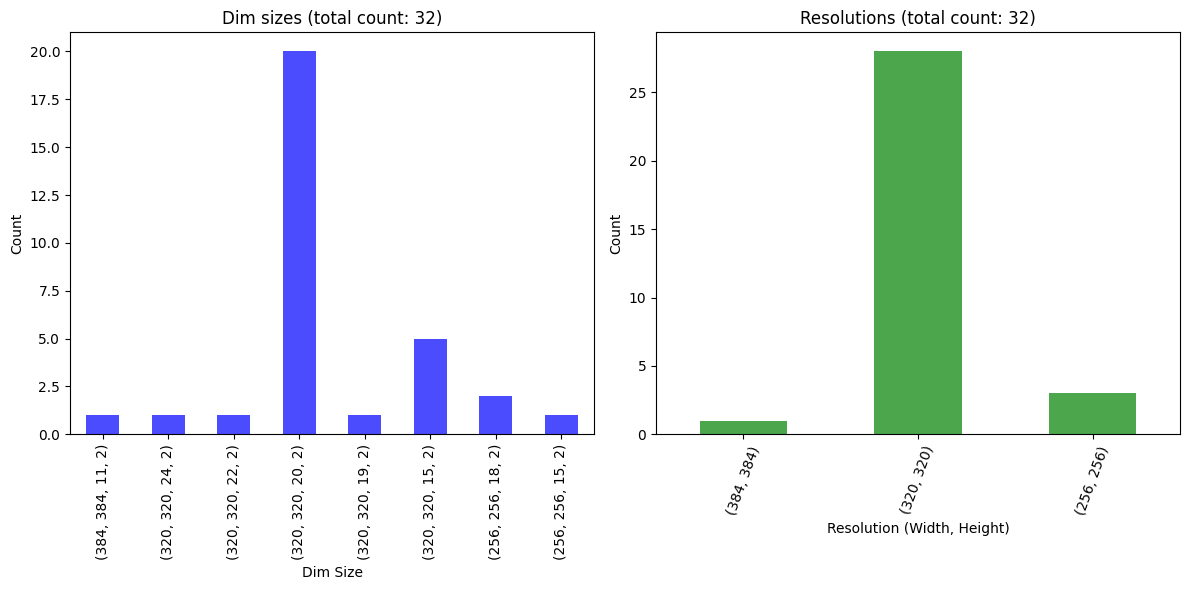

In [76]:
    
# Obtener el conteo de dim_size y ordenarlo
dim_sizes = df['dim_size'].value_counts().sort_index(ascending=False)

# Agrupar por resolución (ancho, alto) ignorando la profundidad
resolution_counts = (
    df['dim_size']
    .apply(lambda x: (x[0], x[1]))  # Extraer solo (ancho, alto)
    .value_counts()
    .sort_index(ascending=False)
)

# Crear dos gráficos separados
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))  # Dos gráficos lado a lado

# Primer gráfico: dim_size
dim_sizes.plot(kind='bar', ax=ax1, color='blue', alpha=0.7)
ax1.set_title(f"Dim sizes (total count: {dim_sizes.sum()})")
ax1.set_xlabel("Dim Size")
ax1.set_ylabel("Count")
ax1.tick_params(axis='x', rotation=90)

# Segundo gráfico: resolución (ancho, alto)
resolution_counts.plot(kind='bar', ax=ax2, color='green', alpha=0.7)
ax2.set_title(f"Resolutions (total count: {resolution_counts.sum()})")
ax2.set_xlabel("Resolution (Width, Height)")
ax2.set_ylabel("Count")
ax2.tick_params(axis='x', rotation=70)

plt.tight_layout()  # Ajustar el diseño para evitar solapamientos
plt.show()

Similar as before but with image voxel spacing.

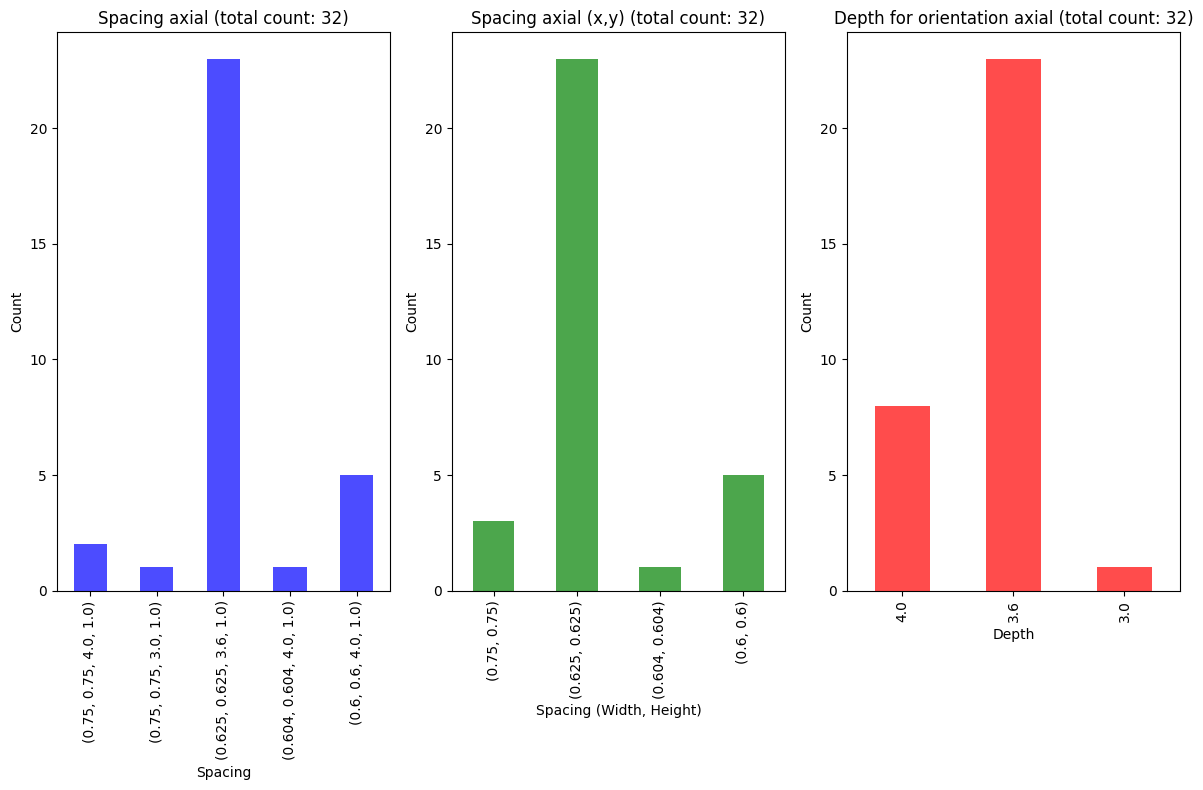

In [77]:

value = "axial"
    
dim_sizes = df['spacing'].value_counts().sort_index(ascending=False)

# Agrupar por resolución (ancho, alto) ignorando la profundidad
resolution_counts = (
    df['spacing']
    .apply(lambda x: (x[0], x[1]))  # Extraer solo (ancho, alto)
    .value_counts()
    .sort_index(ascending=False)
)

# agrupar por la profundidad de la imagen
depth_counts = (
    df['spacing']
    .apply(lambda x: (x[2]))  # Extraer solo la profundidad
    .value_counts()
    .sort_index(ascending=False)
)


# Crear dos gráficos separados
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(12, 8))  # Dos gráficos lado a lado

# Primer gráfico: dim_size
dim_sizes.plot(kind='bar', ax=ax1, color='blue', alpha=0.7)
ax1.set_title(f"Spacing {value} (total count: {dim_sizes.sum()})")
ax1.set_xlabel("Spacing")
ax1.set_ylabel("Count")
ax1.tick_params(axis='x', rotation=90)

# Segundo gráfico: resolución (ancho, alto)
resolution_counts.plot(kind='bar', ax=ax2, color='green', alpha=0.7)
ax2.set_title(f"Spacing {value} (x,y) (total count: {resolution_counts.sum()})")
ax2.set_xlabel("Spacing (Width, Height)")
ax2.set_ylabel("Count")
ax2.tick_params(axis='x', rotation=90)

# Tercer gráfico: profundidad
depth_counts.plot(kind='bar', ax=ax3, color='red', alpha=0.7)
ax3.set_title(f"Depth for orientation {value} (total count: {depth_counts.sum()})")
ax3.set_xlabel("Depth")
ax3.set_ylabel("Count")
ax3.tick_params(axis='x', rotation=90)

plt.tight_layout()  # Ajustar el diseño para evitar solapamientos
plt.show()

We must also check the image pixel intensities for normalization.

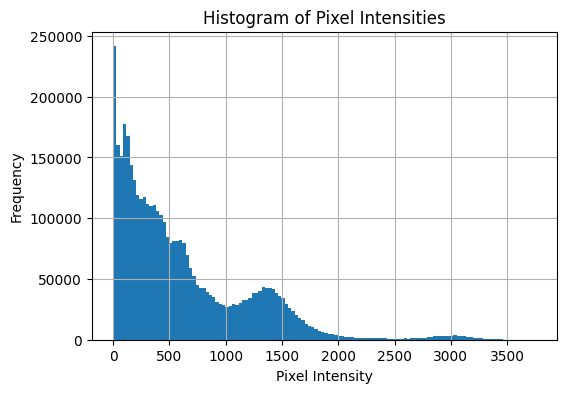

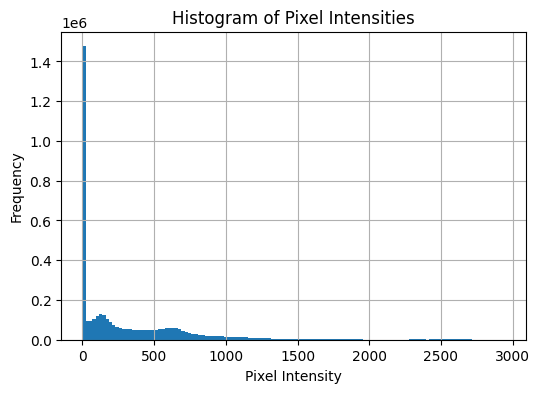

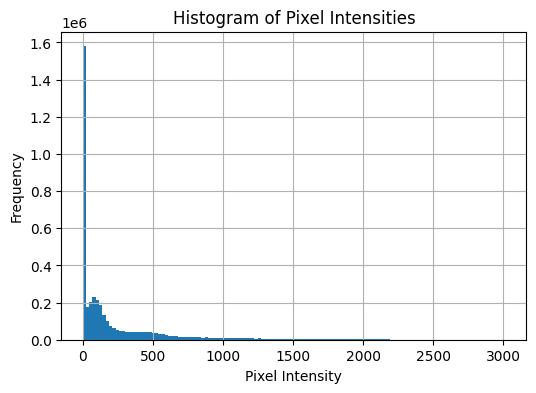

In [ ]:

files_in_dir = analyzer.pick_random(paths["imagesTr"], num=3)

for idx, file in enumerate(files_in_dir):
    
    analyzer.image_intensity_histogram(file, plot = True)   

We'll explore now the extents of the prostate in each image.

We need this information to stablish how much we can center-crop the images without losing any / much information.

In [86]:
import concurrent.futures
# we use concurrency te prevent too many sequential reads of the files which can be slow

parent_dir = join(DATA_ROOT, paths["labelsTr"])
cpus = os.cpu_count()

with concurrent.futures.ProcessPoolExecutor(
    max_workers=cpus
) as executor:
    records = list(
        executor.map(analyzer.calculate_cube_bounds, 
        analyzer.get_files(parent_dir, "^p"))
    )
df = pd.DataFrame(records, columns=['start_z', 'end_z', 'start_y', 
                                    'end_y', 'start_x', 'end_x', 'mask_path',
                                    'bounding_box_size', 'proportion_of_image_size'])
df

,start_z,end_z,start_y,end_y,start_x,end_x,mask_path,bounding_box_size,proportion_of_image_size
0,0,20,80,241,80,241,/media/guest/PORT-DISK/Datasets/Prostate-Datas...,161,0.503125
1,0,15,98,223,98,223,/media/guest/PORT-DISK/Datasets/Prostate-Datas...,125,0.390625
2,0,20,113,208,113,208,/media/guest/PORT-DISK/Datasets/Prostate-Datas...,95,0.296875
3,0,20,110,211,110,211,/media/guest/PORT-DISK/Datasets/Prostate-Datas...,101,0.315625
4,0,20,110,211,110,211,/media/guest/PORT-DISK/Datasets/Prostate-Datas...,101,0.315625
5,0,18,74,183,74,183,/media/guest/PORT-DISK/Datasets/Prostate-Datas...,109,0.425781
6,0,20,112,209,112,209,/media/guest/PORT-DISK/Datasets/Prostate-Datas...,97,0.303125
7,0,20,114,207,114,207,/media/guest/PORT-DISK/Datasets/Prostate-Datas...,93,0.290625
8,0,18,94,163,94,163,/media/guest/PORT-DISK/Datasets/Prostate-Datas...,69,0.269531
9,0,15,110,211,110,211,/media/guest/PORT-DISK/Datasets/Prostate-Datas...,101,0.315625


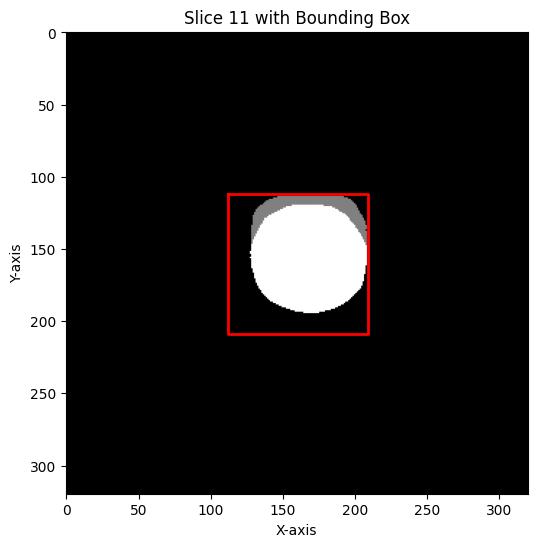

In [99]:
import random
import matplotlib.pyplot as plt

# pick a random number in the range of the dataframe and display the bounding box for the image
random_index = random.randint(0, len(df) - 1)
start_z, end_z, start_y, end_y, start_x, end_x, mask_path,\
    bounding_box_size, proportion_of_image_size = df.iloc[random_index]

mask = sitk.ReadImage(mask_path)
mask_array = sitk.GetArrayFromImage(mask)

analyzer.overlay_bounding_box(mask_array, mask_array.shape[0] //2 ,start_y, end_y, start_x, end_x)


In [102]:
from ipywidgets import interact, IntSlider, fixed

# Create a slider to select the slice index
slider = IntSlider(value=mask_array.shape[0] // 2, min=0, max=mask_array.shape[0]-1, step=1, description='Slice Index')
# Use interact to create the interactive bounding box display
# Note: 'fixed' is used to pass fixed values for        
# the bounding box parameters so they don't change with the slider.
interact(analyzer.overlay_bounding_box, mask=fixed(mask_array), slice=slider, start_y=fixed(start_y), end_y=fixed(end_y), start_x=fixed(start_x), end_x=fixed(end_x))


interactive(children=(IntSlider(value=11, description='Slice Index', max=21), Output()), _dom_classes=('widget…

<function ipywidgets.widgets.interaction._InteractFactory.__call__.<locals>.<lambda>(*args, **kwargs)>

Now that we have this, and since the bounding box si centered and square, we can calculate easily the distribution of the bounding box sizes in the dataset. 

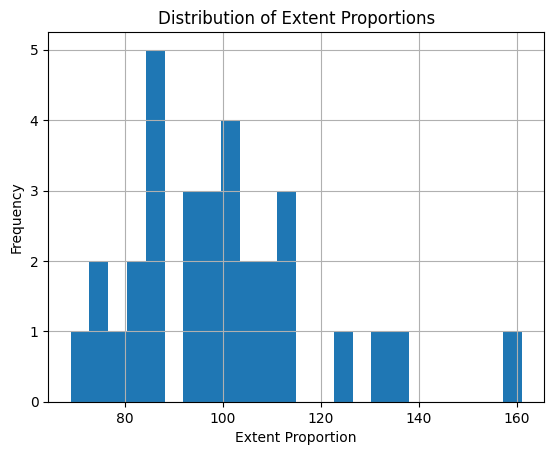

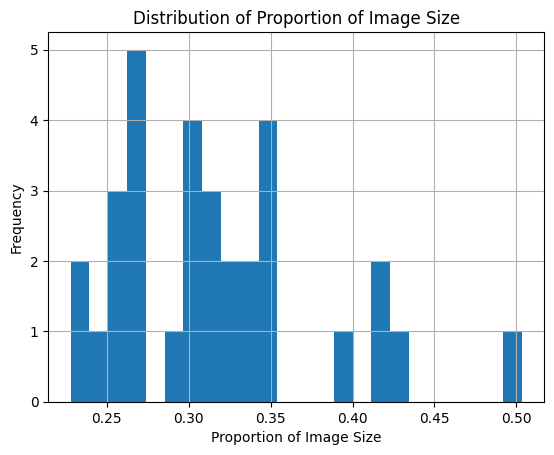

In [104]:
# using 'start_y', 'end_y', 'start_x', 'end_x', calculate the 
# size of the bounding box as the maximum of the width and height, 
# and then calculate the proportion of that wrt the image size, to 
# get a sense of how much we can crop the image


# distribution of extent proportions
df['bounding_box_size'].hist(bins=24)
plt.title("Distribution of Extent Proportions")
plt.xlabel("Extent Proportion")
plt.ylabel("Frequency")
plt.show()

df['proportion_of_image_size'].hist(bins=24)
plt.title("Distribution of Proportion of Image Size")
plt.xlabel("Proportion of Image Size")
plt.ylabel("Frequency")
plt.show()


